In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from scipy import stats
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# [x4_source, x5_source, x4_target, x5_target]

In [3]:
#with open('Encoder_5_feature_map_x4s_x5s_x4t_x5t.pkl', 'rb') as f:
#    list5 = pickle.load(f)

In [4]:
#for i in range(len(list5)):
#    print(list5[i].shape)

In [5]:
# [x4_source, x4_target]

In [6]:
#with open('Encoder_4_feature_map_x4s_x4t.pkl', 'rb') as f:
#    list4 = pickle.load(f)

In [7]:
#for i in range(len(list4)):
#    print(list4[i].shape)

In [8]:
#feature_maps = list5[1]

In [ ]:
########## 4Encoder_4FC ##########
  #x_source,x1_source,x2_source,x3_source,x4_source,fc1_source,fc2_source,fc3_source,fc_last_source,x_target,x1_target,x2_target,x3_target,x4_target,fc1_target,fc2_target,fc3_target,fc_last_target = model(source_image, target_image)
  ########## 4RB 2FC ##########
  #output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,fc_source,out_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target,fc_target,out_target = model(source_image, target_image)
  ########## 3RB 2FC ##########
 # output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,fc_source,out_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,fc_target,out_target = model(source_image, target_image)

In [9]:
#
#output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target
#output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target
#x_source,x1_source,x2_source,x3_source,x4_source,x_target,x1_target,x2_target,x3_target,x4_target

In [4]:
with open('Encoder_3RB_GAP_2FCLayer_feature_map.pkl', 'rb') as f:
    RB_GAP3 = pickle.load(f)
with open('Encoder_4RB_GAP_2FCLayer_feature_map.pkl', 'rb') as f:
    RB_GAP4 = pickle.load(f)
with open('Encoder_4Encoder_4FC_feature_map.pkl', 'rb') as f:
    FC4 = pickle.load(f)

In [3]:
for i in range(len(RB_GAP3)):
    print(RB_GAP3[i].shape)

(128, 3)
(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 256, 1, 1)
(128, 128)
(128, 3)
(128, 3)
(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 256, 1, 1)
(128, 128)
(128, 3)


In [55]:
for i in range(len(RB_GAP4)):
    print(RB_GAP4[i].shape)

(128, 3)
(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 256, 5, 5)
(128, 512, 3, 3)
(128, 512, 1, 1)
(128, 256)
(128, 3)
(128, 3)
(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 256, 5, 5)
(128, 512, 3, 3)
(128, 512, 1, 1)
(128, 256)
(128, 3)


In [6]:
for i in range(len(FC4)):
    print(FC4[i].shape)

(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 512, 3, 3)
(128, 2048)
(128, 1024)
(128, 512)
(128, 3)
(128, 64, 40, 40)
(128, 64, 20, 20)
(128, 128, 10, 10)
(128, 256, 5, 5)
(128, 512, 3, 3)
(128, 2048)
(128, 1024)
(128, 512)
(128, 3)


In [6]:
def plotter(encoder_type,entity_number=-1,mode='Heatmap'):
    feature_ids = []
    if(encoder_type=="RB_GAP3"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = RB_GAP3[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    elif(encoder_type=="RB_GAP4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = RB_GAP4[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    elif(encoder_type=="FC4"):
        print("x_source,x1_source,x2_source,x3_source,x4_source,x_target,x1_target,x2_target,x3_target,x4_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = FC4[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    
    if mode=='Heatmap':  
        
        fig = plt.figure(figsize=(24,10))
        ax0 = fig.add_subplot(311, aspect='equal') #241
        plt.title('Feature '+str(feature_ids[0]))
        sns.heatmap(feature_maps[0, feature_ids[0], :, :], cbar=False, square = True, ax = ax0)
        

        ax1 = fig.add_subplot(312, aspect='equal') #242
        plt.title('Feature '+str(feature_ids[1]))
        sns.heatmap(feature_maps[0, feature_ids[1], :, :], cbar=False, square = True, ax = ax1)

        ax2 = fig.add_subplot(313, aspect='equal') #243
        plt.title('Feature '+str(feature_ids[2]))
        sns.heatmap(feature_maps[0, feature_ids[2], :, :], cbar=False, square = True, ax = ax2)

        #ax3 = fig.add_subplot(244, aspect='equal')
        #plt.title('Feature '+str(feature_ids[3]))
        #sns.heatmap(feature_maps[0, feature_ids[3], :, :], cbar=False, square = True, ax = ax3)

        #ax4 = fig.add_subplot(245, aspect='equal')
        #plt.title('Feature '+str(feature_ids[4]))
        #sns.heatmap(feature_maps[0, feature_ids[4], :, :], cbar=False, square = True, ax = ax4)

        #ax5 = fig.add_subplot(246, aspect='equal')
        #plt.title('Feature '+str(feature_ids[5]))
        #sns.heatmap(feature_maps[0, feature_ids[5], :, :], cbar=False, square = True, ax = ax5)

        #ax6 = fig.add_subplot(247, aspect='equal')
        #plt.title('Feature '+str(feature_ids[6]))
        #sns.heatmap(feature_maps[0, feature_ids[6], :, :], cbar=False, square = True, ax = ax6)

        #ax7 = fig.add_subplot(248, aspect='equal')
        #plt.title('Feature '+str(feature_ids[7]))
        #sns.heatmap(feature_maps[0, feature_ids[7], :, :], cbar=False, square = True, ax = ax7)


        #fig.subplots_adjust(left=2.5*0.125, bottom=0.1, right=2.5*0.9, top=2*0.9, wspace=0.2, hspace=0.2)
        plt.tight_layout()
        fig.savefig('Heatmap'+encoder_type+'_'+str(entity_number)+'.png', dpi = 300)
        
    elif mode=='t-SNE':
        X = feature_maps[0]
        X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        time_start = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(X)
        print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
        plt.figure(figsize=(5,5))
        plt.title('tsne plot')
        plt.xlabel('tsne-one')
        plt.ylabel('tsne-two')
        sns.scatterplot(tsne_results[:,0],tsne_results[:,1])
        plt.savefig('t-SNE'+encoder_type+'_'+str(entity_number)+'.jpg')
        
    elif mode=='PCA':
        X = feature_maps[0]
        X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(X)
        print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
        plt.figure(figsize=(5,5))
        plt.title('PCA plot')
        plt.xlabel('PCA-one')
        plt.ylabel('PCA-two')
        sns.scatterplot(pca_result[:,0],pca_result[:,1])
        plt.savefig('PCA'+encoder_type+'_'+str(entity_number)+'.jpg')

In [4]:
def plotter_modified(encoder_type,entity_number=-1,mode='Heatmap'):
    feature_ids = []
    if(encoder_type=="RB_GAP3"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = RB_GAP3[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    elif(encoder_type=="RB_GAP4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = RB_GAP4[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    elif(encoder_type=="FC4"):
        print("x_source,x1_source,x2_source,x3_source,x4_source,x_target,x1_target,x2_target,x3_target,x4_target")
        print("enter entity number")
        entity_number=int(input())
        feature_maps = FC4[entity_number]
        print("No. of features = "+str(feature_maps.shape[1]))
        print("Enter feature ids for any 3 features")
        if mode=='Heatmap':
            for i in range(3):
                feature_ids.append(int(input()))
    
    if mode=='Heatmap':  
        
        fig = plt.figure(figsize=(14,10))
        ax0 = fig.add_subplot(311) #241
        plt.title('Feature '+str(feature_ids[0]))
        sns.distplot(np.ndarray.flatten(feature_maps[0, feature_ids[0], :, :]), bins=5, kde=False, rug=True);

        ax1 = fig.add_subplot(312) #242
        plt.title('Feature '+str(feature_ids[1]))
        sns.distplot(np.ndarray.flatten(feature_maps[0, feature_ids[1], :, :]), bins=5, kde=False, rug=True);

        ax2 = fig.add_subplot(313) #243
        plt.title('Feature '+str(feature_ids[2]))
        sns.distplot(np.ndarray.flatten(feature_maps[0, feature_ids[2], :, :]), bins=5, kde=False, rug=True);

        #ax3 = fig.add_subplot(244, aspect='equal')
        #plt.title('Feature '+str(feature_ids[3]))
        #sns.heatmap(feature_maps[0, feature_ids[3], :, :], cbar=False, square = True, ax = ax3)

        #ax4 = fig.add_subplot(245, aspect='equal')
        #plt.title('Feature '+str(feature_ids[4]))
        #sns.heatmap(feature_maps[0, feature_ids[4], :, :], cbar=False, square = True, ax = ax4)

        #ax5 = fig.add_subplot(246, aspect='equal')
        #plt.title('Feature '+str(feature_ids[5]))
        #sns.heatmap(feature_maps[0, feature_ids[5], :, :], cbar=False, square = True, ax = ax5)

        #ax6 = fig.add_subplot(247, aspect='equal')
        #plt.title('Feature '+str(feature_ids[6]))
        #sns.heatmap(feature_maps[0, feature_ids[6], :, :], cbar=False, square = True, ax = ax6)

        #ax7 = fig.add_subplot(248, aspect='equal')
        #plt.title('Feature '+str(feature_ids[7]))
        #sns.heatmap(feature_maps[0, feature_ids[7], :, :], cbar=False, square = True, ax = ax7)


        #fig.subplots_adjust(left=2.5*0.125, bottom=0.1, right=2.5*0.9, top=2*0.9, wspace=0.2, hspace=0.2)
        plt.tight_layout()
        fig.savefig('Heatmap'+encoder_type+'_'+str(entity_number)+'.png', dpi = 300)
        
    elif mode=='t-SNE':
        X = feature_maps[0]
        X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        time_start = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(X)
        print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
        plt.figure(figsize=(5,5))
        plt.title('tsne plot')
        plt.xlabel('tsne-one')
        plt.ylabel('tsne-two')
        sns.scatterplot(tsne_results[:,0],tsne_results[:,1])
        plt.savefig('t-SNE'+encoder_type+'_'+str(entity_number)+'.jpg')
        
    elif mode=='PCA':
        X = feature_maps[0]
        X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(X)
        print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
        plt.figure(figsize=(5,5))
        plt.title('PCA plot')
        plt.xlabel('PCA-one')
        plt.ylabel('PCA-two')
        sns.scatterplot(pca_result[:,0],pca_result[:,1])
        plt.savefig('PCA'+encoder_type+'_'+str(entity_number)+'.jpg')

In [2]:
def plotter_histogram(encoder_type,entity_number=-1):
    feature_ids = []
    if(encoder_type=="RB_GAP3"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source0 = RB_GAP3[entity_number_s]
        feature_maps_target0 = RB_GAP3[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source1 = RB_GAP3[entity_number_s]
        feature_maps_target1 = RB_GAP3[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source2 = RB_GAP3[entity_number_s]
        feature_maps_target2 = RB_GAP3[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source3 = RB_GAP3[entity_number_s]
        feature_maps_target3 = RB_GAP3[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source4 = RB_GAP3[entity_number_s]
        feature_maps_target4 = RB_GAP3[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source5 = RB_GAP3[entity_number_s]
        feature_maps_target5 = RB_GAP3[entity_number_t]
        fig = plt.figure(figsize=(20,12))
        ax0 = fig.add_subplot(321)
        sns.distplot(np.ndarray.flatten(feature_maps_source0), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target0), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("first_conv_source / first_conv_target", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax0.get_legend().get_texts(), fontsize='22')
        ax1 = fig.add_subplot(322)
        sns.distplot(np.ndarray.flatten(feature_maps_source1), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target1), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_1_source / rb_1_target", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax1.get_legend().get_texts(), fontsize='22')
        ax2 = fig.add_subplot(323)
        sns.distplot(np.ndarray.flatten(feature_maps_source2), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target2), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.ylabel("Probability distribution", fontsize=26)
        plt.title("rb_2_source / rb_2_target", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax2.get_legend().get_texts(), fontsize='22')
        ax3 = fig.add_subplot(324)
        sns.distplot(np.ndarray.flatten(feature_maps_source3), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target3), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_3_source / rb_3_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax3.get_legend().get_texts(), fontsize='22')
        ax4 = fig.add_subplot(325)
        sns.distplot(np.ndarray.flatten(feature_maps_source4), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target4), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.xlabel("Feature Map distribution", fontsize=26)
        plt.title("gap_source / gap_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax4.get_legend().get_texts(), fontsize='22')
        ax5 = fig.add_subplot(326)
        sns.distplot(np.ndarray.flatten(feature_maps_source5), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target5), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.xlabel("Feature Map distribution", fontsize=26)
        plt.title("fc1_source / fc1_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax5.get_legend().get_texts(), fontsize='22')
        

        #fig.subplots_adjust(left=2.5*0.125, bottom=0.1, right=2.5*0.9, top=2*0.9, wspace=0.2, hspace=0.2)
        plt.tight_layout()
        fig.savefig('Histogram'+encoder_type+'_'+str(entity_number)+'.png', dpi = 300)
        
       
    elif(encoder_type=="RB_GAP4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source0 = RB_GAP4[entity_number_s]
        feature_maps_target0 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source1 = RB_GAP4[entity_number_s]
        feature_maps_target1 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source2 = RB_GAP4[entity_number_s]
        feature_maps_target2 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source3 = RB_GAP4[entity_number_s]
        feature_maps_target3 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source4 = RB_GAP4[entity_number_s]
        feature_maps_target4 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source5 = RB_GAP4[entity_number_s]
        feature_maps_target5 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source6 = RB_GAP4[entity_number_s]
        feature_maps_target6 = RB_GAP4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source7 = RB_GAP4[entity_number_s]
        feature_maps_target7 = RB_GAP4[entity_number_t]
        fig = plt.figure(figsize=(24,16))
        ax0 = fig.add_subplot(421)
        sns.distplot(np.ndarray.flatten(feature_maps_source0), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target0), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("first_conv_source / first_conv_target", fontsize=26)
        plt.ylabel("Probability distribution", fontsize=26)
        plt.setp(ax0.get_legend().get_texts(), fontsize='22')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax0.get_legend().get_texts(), fontsize='22')
        ax1 = fig.add_subplot(422)
        sns.distplot(np.ndarray.flatten(feature_maps_source1), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target1), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_1_source / rb_1_target", fontsize=26)
        plt.setp(ax1.get_legend().get_texts(), fontsize='22')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax2 = fig.add_subplot(423)
        sns.distplot(np.ndarray.flatten(feature_maps_source2), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target2), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.setp(ax2.get_legend().get_texts(), fontsize='22')
        plt.title("rb_2_source / rb_2_target", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax3 = fig.add_subplot(424)
        sns.distplot(np.ndarray.flatten(feature_maps_source3), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target3), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.setp(ax3.get_legend().get_texts(), fontsize='22')
        plt.title("rb_3_source / rb_3_target", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax4 = fig.add_subplot(425)
        sns.distplot(np.ndarray.flatten(feature_maps_source4), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target4), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_4_source / rb_4_target", fontsize=26)
        plt.ylabel("Probability distribution", fontsize=26)
        plt.setp(ax4.get_legend().get_texts(), fontsize='22')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax5 = fig.add_subplot(426)
        sns.distplot(np.ndarray.flatten(feature_maps_source5), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target5), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("gap_source / gap_target ", fontsize=26)
        plt.setp(ax5.get_legend().get_texts(), fontsize='22')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        ax6 = fig.add_subplot(427)
        sns.distplot(np.ndarray.flatten(feature_maps_source6), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target6), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.xlabel("Feature Map distribution", fontsize=26)
        plt.title("fc1_source / fc1_target ", fontsize=26)
        plt.setp(ax6.get_legend().get_texts(), fontsize='22')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        #ax7 = fig.add_subplot(428)
        #sns.distplot(np.ndarray.flatten(feature_maps_source7), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        #sns.distplot(np.ndarray.flatten(feature_maps_target7), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        #plt.xlabel("Feature Map distribution", fontsize=26)
        #plt.setp(ax7.get_legend().get_texts(), fontsize='22')
        #plt.title("fc_source / fc_target ", fontsize=26)
        

        #fig.subplots_adjust(left=2.5*0.125, bottom=0.1, right=2.5*0.9, top=2*0.9, wspace=0.2, hspace=0.2)
        plt.tight_layout()
        fig.savefig('Histogram'+encoder_type+'_'+str(entity_number)+'.png', dpi = 300)
       
    elif(encoder_type=="FC4"):
        print("x_source,x1_source,x2_source,x3_source,x4_source,x_target,x1_target,x2_target,x3_target,x4_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source0 = FC4[entity_number_s]
        feature_maps_target0 = FC4[entity_number_t]
        #np.save(r'feature_maps_source.npy', feature_maps_source)
        #np.save(r'feature_maps_target.npy', feature_maps_target)
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source1 = FC4[entity_number_s]
        feature_maps_target1 = FC4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source2 = FC4[entity_number_s]
        feature_maps_target2 = FC4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source3 = FC4[entity_number_s]
        feature_maps_target3 = FC4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source4 = FC4[entity_number_s]
        feature_maps_target4 = FC4[entity_number_t]
        np.save(r'feature_maps_source4.npy', feature_maps_source4)
        np.save(r'feature_maps_target4.npy', feature_maps_target4)
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source5 = FC4[entity_number_s]
        feature_maps_target5 = FC4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source6 = FC4[entity_number_s]
        feature_maps_target6 = FC4[entity_number_t]
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source7 = FC4[entity_number_s]
        feature_maps_target7 = FC4[entity_number_t]
        print(max(np.ndarray.flatten(feature_maps_source7)))
        print(max(np.ndarray.flatten(feature_maps_target7)))
       
        
        
        fig = plt.figure(figsize=(24,16))
        ax0 = fig.add_subplot(421)
        sns.distplot(np.ndarray.flatten(feature_maps_source0), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target0), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("first_conv_source / first_conv_source", fontsize=26)
        plt.ylabel("Probability distribution", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax0.get_legend().get_texts(), fontsize='22')
        ax1 = fig.add_subplot(422)
        sns.distplot(np.ndarray.flatten(feature_maps_source1), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target1), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_1_source / rb_1_source", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax1.get_legend().get_texts(), fontsize='22')
        ax2 = fig.add_subplot(423)
        sns.distplot(np.ndarray.flatten(feature_maps_source2), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target2), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_2_source / rb_2_source", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax2.get_legend().get_texts(), fontsize='22')
        ax3 = fig.add_subplot(424)
        sns.distplot(np.ndarray.flatten(feature_maps_source3), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target3), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_3_source / rb_3_source ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax3.get_legend().get_texts(), fontsize='22')
        ax4 = fig.add_subplot(425)
        sns.distplot(np.ndarray.flatten(feature_maps_source4[np.where(feature_maps_source4!=0)]), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target4[np.where(feature_maps_target4!=0)]), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("rb_4_source / rb_4_source ", fontsize=26)
        plt.ylabel("Probability distribution", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax4.get_legend().get_texts(), fontsize='22')
        ax5 = fig.add_subplot(426)
        sns.distplot(np.ndarray.flatten(feature_maps_source5[np.where(feature_maps_source5!=0)]), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target5[np.where(feature_maps_target5!=0)]), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.title("fc1_source / fc1_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax5.get_legend().get_texts(), fontsize='22')
        ax6 = fig.add_subplot(427)
        sns.distplot(np.ndarray.flatten(feature_maps_source6[np.where(feature_maps_source6!=0)]), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot(np.ndarray.flatten(feature_maps_target6[np.where(feature_maps_target6!=0)]), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        plt.xlabel("Feature Map distribution", fontsize=26)
        plt.title("fc2_source / fc2_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax6.get_legend().get_texts(), fontsize='22')
        ax7 = fig.add_subplot(428)
        feature_maps_source7_new = np.ndarray.flatten(feature_maps_source7)/max(np.ndarray.flatten(feature_maps_source7))
        feature_maps_target7_new = np.ndarray.flatten(feature_maps_target7)/max(np.ndarray.flatten(feature_maps_target7))
        sns.distplot((feature_maps_source7_new[np.where(feature_maps_source7_new!=0)]), bins=5,  kde = True, hist=False,  kde_kws={"lw": 3, "label": "Netherlands"} );
        sns.distplot((feature_maps_target7_new[np.where(feature_maps_target7_new!=0)]), bins=5,  kde = True, hist=False, kde_kws={"lw": 3, "label": "Penobscot"} );
        #plt.hist(feature_maps_source7, 10)
        #plt.hist(feature_maps_target7, 10)
        plt.xlabel("Feature Map distribution", fontsize=26)
        plt.title("fc3_source / fc3_target ", fontsize=26)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.setp(ax7.get_legend().get_texts(), fontsize='22')
       
        

        #fig.subplots_adjust(left=2.5*0.125, bottom=0.1, right=2.5*0.9, top=2*0.9, wspace=0.2, hspace=0.2)
        plt.tight_layout()
        fig.savefig('Histogram'+encoder_type+'_'+str(entity_number)+'.png', dpi = 300)
        
    
        
   

output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target
enter entity number source
1
enter entity number target
9
enter entity number source
2
enter entity number target
10
enter entity number source
3
enter entity number target
11
enter entity number source
4
enter entity number target
12
enter entity number source
5
enter entity number target
13
enter entity number source
6
enter entity number target
14


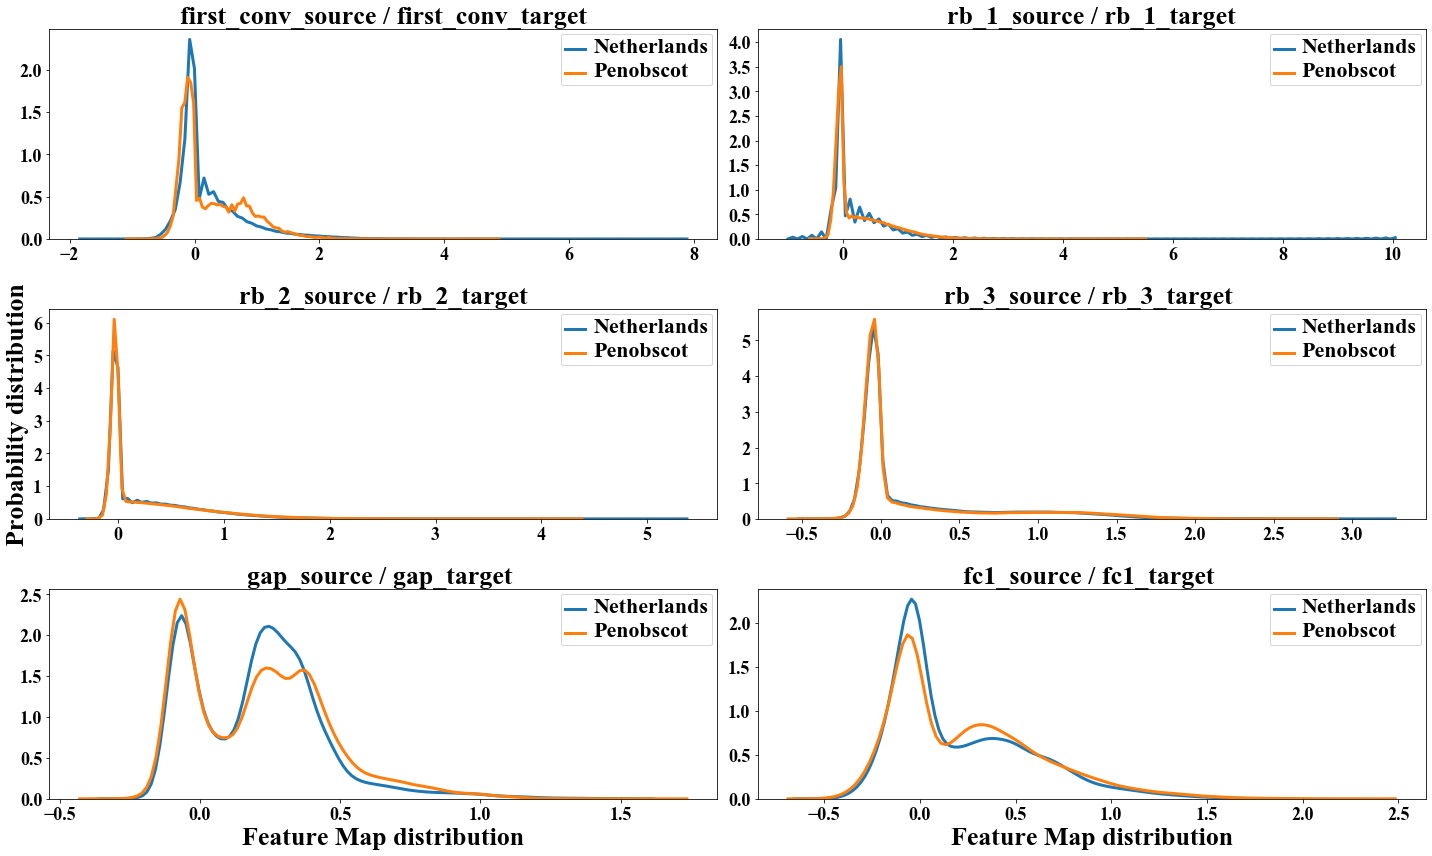

In [5]:
#plotter("FC4")
#plotter("RB_GAP3",_,'Heatmap')
#plotter_modified("RB_GAP3",_,'H16eatmap')
plotter_histogram("RB_GAP3",_)
#plotter("FC4",_,'PCA')

## plotter("RB_GAP3")
plotter("RB_GAP3",_,'t-SNE')
#plotter("RB_GAP3",_,'PCA')

output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,x4_feature_map_source,x4_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target,x4_feature_map_target,x4_target
enter entity number
2
No. of features = 64
Enter feature ids for any 8 features
[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.717384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.236446
[t-SNE] KL divergence after 300 iterations: 0.687225
t-SNE done! Time elapsed: 0.1017293930053711 seconds


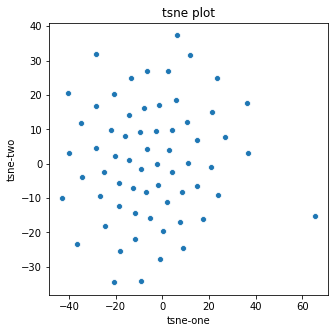

In [34]:
#plotter("RB_GAP4")
plotter("RB_GAP4",_,'t-SNE')
#plotter("RB_GAP4",_,'PCA')

In [6]:
def pearson_coeff(encoder_type,entity_number=-1):
    feature_ids = []
    # Pearson Coefficient

    # model RB_GAP3 
    if(encoder_type=="RB_GAP3"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = RB_GAP3[entity_number_s]
        feature_maps_target = RB_GAP3[entity_number_t]
    
    elif(encoder_type=="RB_GAP4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = RB_GAP4[entity_number_s]
        feature_maps_target = RB_GAP4[entity_number_t]
        
   
        
    elif(encoder_type=="FC4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = FC4[entity_number_s]
        feature_maps_target = FC4[entity_number_t]
  
    
    print("Enter feature ids for any 3 features")
    for i in range(3):
        feature_ids.append(int(input()))
    print(len(feature_ids))

    for i in range(3):
        data1 = np.ndarray.flatten(feature_maps_source[0, feature_ids[i], :, :]);
        data2 = np.ndarray.flatten(feature_maps_target[0, feature_ids[i], :, :]);
        # calculate covariance matrix
        covariance,_ = pearsonr(data1, data2)
        print(covariance)
        
    

    



In [52]:
def pearson_coeff_modified(encoder_type,entity_number=-1):
    feature_ids = []
    # Pearson Coefficient

    # model RB_GAP3 
    if(encoder_type=="RB_GAP3"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = RB_GAP3[entity_number_s]
        feature_maps_target = RB_GAP3[entity_number_t]
    
    elif(encoder_type=="RB_GAP4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = RB_GAP4[entity_number_s]
        feature_maps_target = RB_GAP4[entity_number_t]
        
   
        
    elif(encoder_type=="FC4"):
        print("output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target")
        print("enter entity number source")
        entity_number_s=int(input())
        print("enter entity number target")
        entity_number_t=int(input())
        feature_maps_source = FC4[entity_number_s]
        feature_maps_target = FC4[entity_number_t]
  
    
    #print("Enter feature ids for any 3 features")
    #for i in range(3):
    #    feature_ids.append(int(input()))
    #print(feature_maps_source.shape)
    #print(feature_maps_target.shape)

    
    data1 = np.ndarray.flatten(feature_maps_source);
    data2 = np.ndarray.flatten(feature_maps_target);
        # calculate covariance matrix
    #covariance,_ = pearsonr(data1, data2)
    covariance= stats.ks_2samp(data1, data2)
    
    print(covariance)
        
    

    



In [51]:
#pearson_coeff("RB_GAP4",_)
pearson_coeff_modified("FC4",_)

output_source,x_source,x1_source,x2_source,x3_feature_map_source,x3_source,output_target,x_target,x1_target,x2_target,x3_feature_map_target,x3_target
enter entity number source
7
enter entity number target
16
0.2635570627276686


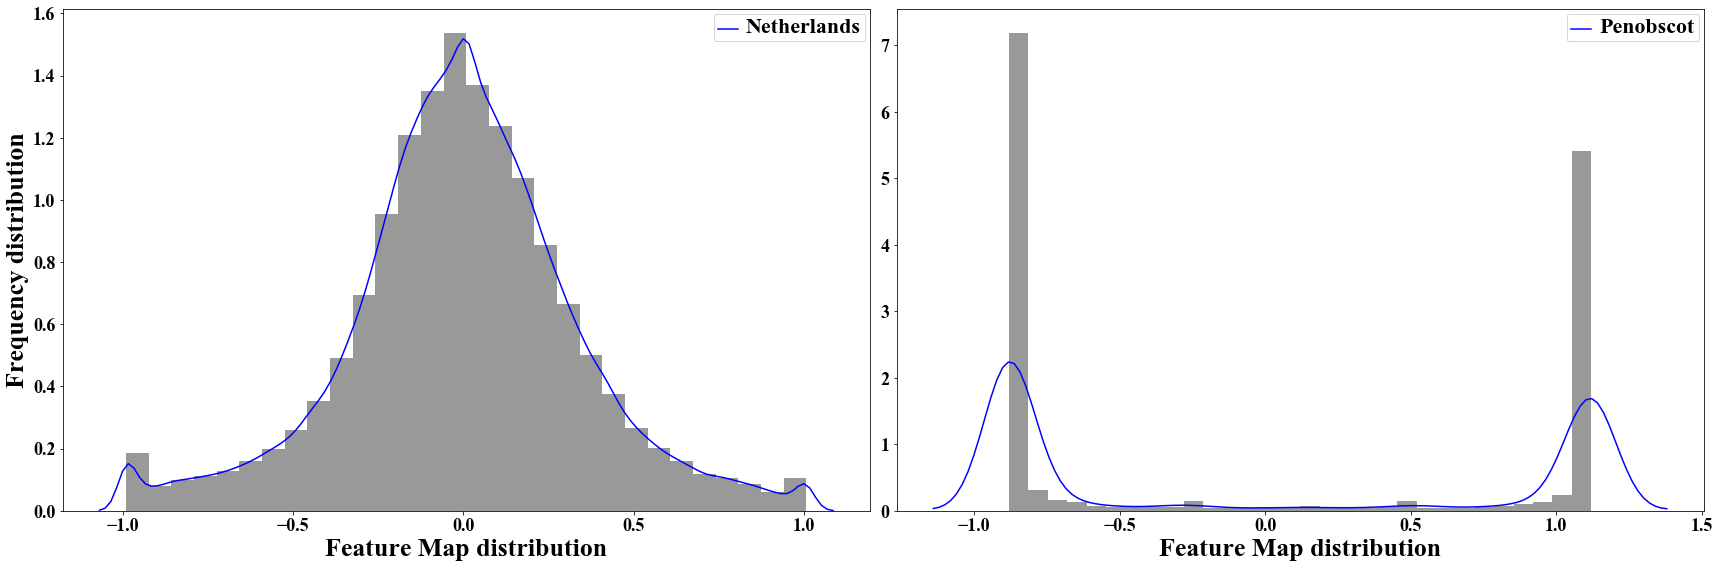

In [7]:
 X = np.load('source.npy')
#Xnew = X[np.where(X!=0)]
Y = np.load('target.npy')
#print(len(Xnew), len(Ynew))
#Ynew = Y[np.where(Y!=0)]
fig = plt.figure(figsize=(24,8))
ax0 = fig.add_subplot(121)
sns.distplot(np.ndarray.flatten(X), bins=30,  kde = True, hist=True, color="k", kde_kws={"lw": 1.5, "label": "Netherlands", "color": "b"} );
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.setp(ax0.get_legend().get_texts(), fontsize='22')
plt.ylabel("Frequency distribution", fontsize=26)
plt.xlabel("Feature Map distribution", fontsize=26)
ax1 = fig.add_subplot(122)
sns.distplot(np.ndarray.flatten(Y), bins=30,  kde = True, hist=True,  color="k", kde_kws={"lw": 1.5, "label": "Penobscot" , "color": "b"} );
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.setp(ax1.get_legend().get_texts(), fontsize='22')
plt.xlabel("Feature Map distribution", fontsize=26)
plt.tight_layout()
fig.savefig('Distribution_Initial.png', dpi = 300)
#plt.scatter(X,Y)
#plt.show()